Lets download a sample image from google maps.

In [1]:
from keras.preprocessing.image import img_to_array
from keras.applications import imagenet_utils
from PIL import Image
import io
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


(402, 404, 3)


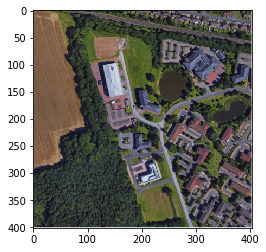

In [2]:
raw_image_path = "sat_image.jpg"
raw_image = Image.open(raw_image_path)
raw_image_array = np.asarray(raw_image)
print(raw_image_array.shape)
plt.imshow(raw_image_array);

OK we need to resize the image for processing with our model since it requires images of 256×256 pixels. 
This `prepare_image` function:

* Accepts an input image
* Converts the mode to RGB (if necessary)
* Resizes it to 224x224 pixels (the input spatial dimensions for ResNet)
* Preprocesses the array via mean subtraction and scaling

In [3]:
def prepare_image(image, target):
    """
    Used by https://github.com/jrosebr1/simple-keras-rest-api/blob/master/run_keras_server.py.
    """
    if image.mode != "RGB":
        image = image.convert("RGB")
    image = image.resize(target)
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    image = imagenet_utils.preprocess_input(image)
    return image

In [4]:
processed_image = prepare_image(raw_image, target=(256, 256))

In [5]:
processed_image.shape

(1, 256, 256, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


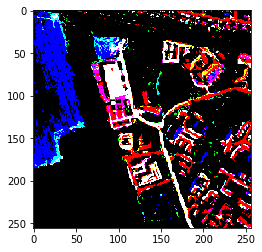

In [6]:
plt.imshow(processed_image[0, :, :, :]);